## Basic Visualization

- "A picture is worth more than 1,000 words"
- Different types of visualizations depending on: 
    - the nature of the underlying data: qualitative (words) vs. Quantitative (numbers)
    - the message or point that the programmer wants to convey 
- Multiple types of visualization can be combined together to make more complex and nuanced statements 

### Visualizing text data in a word cloud

- Python has a package called WordCloud that generates the word cloud form a string of text. 
    - Input is a string of text and the output is the cloud object 
    - To install wordcloud in your Jupyter notebook, use `!pip install WordCloud`
- After the cloud is generated, the `.plot()` method of matplotlib is used to produce and display figure

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [58]:
%matplotlib notebook #interactive mode of matplotlib

# Source: https://www.datacareer.de/blog/accessing-the-news-api-in-python/
# code to create a word cloud with the headlines 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests 

In [60]:
secret = 'e66483a4f4b0480a9a29a4fac0586469'

# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

# Specify the query and number of returns
parameters = {
    'q': 'big data', # query phrase
    'pageSize': 20,  # maximum is 100
    'apiKey': secret # your own API key
}

type(parameters)

# create an empty string
text_combined = ''

# Make the request
response = requests.get(url, params=parameters)

response_json = response.json()

for i in response_json['articles']:
    text_combined += i['title'] + ' ' # add a space after every headline, so the first and last words are not glued together

# print the first 300 characters to screen for inspection 
print(text_combined[0:300])

Big Tech's Psychedelics Grift World Series: The sports data pioneer who spotted baseball's big fix of 1919 Sodium Batteries May Power Your New Electric Car UK Supreme Court rules in favor of Google in iPhone tracking case This AI predicts how old children are. Can it keep them safe? Wall Street adva


<IPython.core.display.Javascript object>


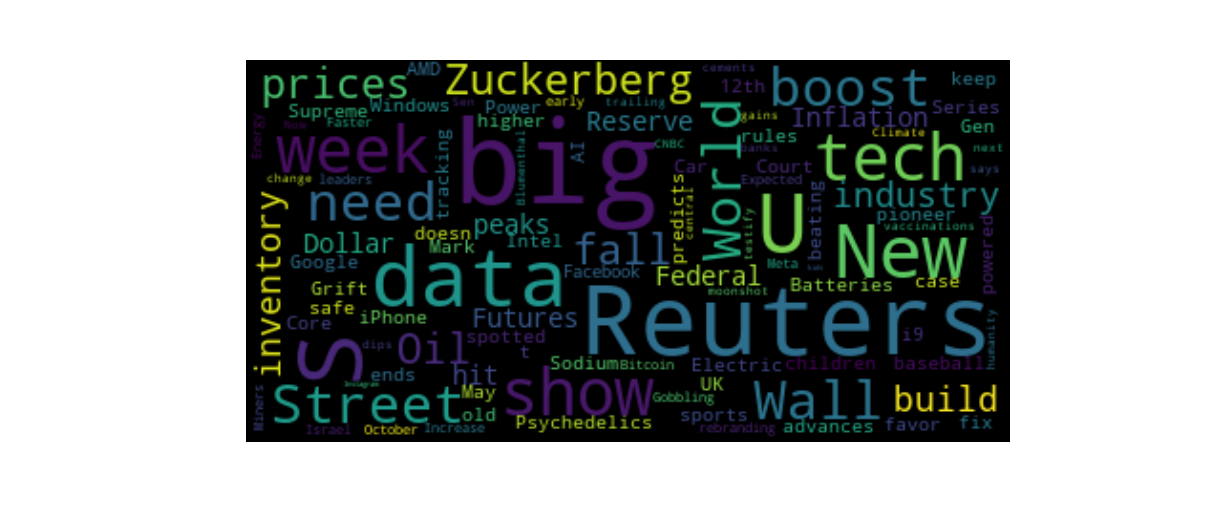

In [80]:
wordcloud = WordCloud(max_font_size=60).generate(text_combined)

plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Lab for visualization

In [1]:
#Ex: Visualization Tutorial
# source: https://realpython.com/pandas-plot-python/
import pandas as pd

d_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")
df = pd.read_csv(d_url)
pd.set_option("display.max.columns", None)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [81]:
df.shape

(173, 21)

<IPython.core.display.Javascript object>


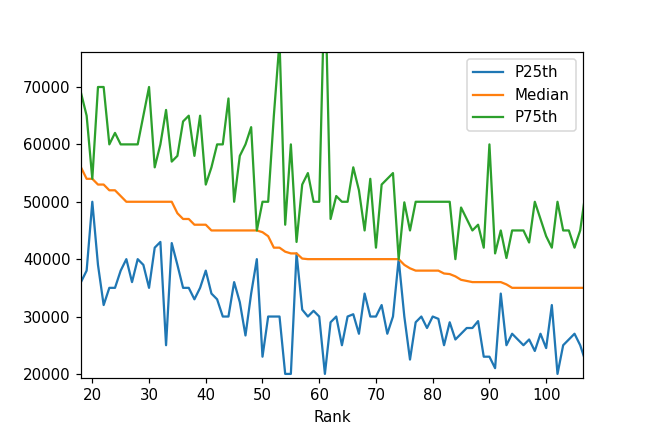

<AxesSubplot:xlabel='Rank'>

In [56]:
# show the distribution of earnings graphically 
df.plot(x = "Rank", y = ["P25th", "Median", "P75th"])

<AxesSubplot:ylabel='Frequency'>

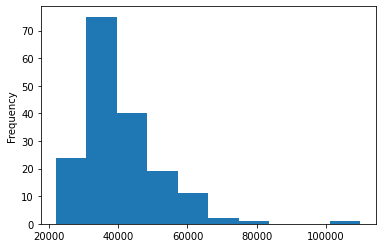

In [17]:
#Survey your data by creating a histogram for the median column
median_column = df["Median"]
median_column.plot(kind="hist")

<AxesSubplot:xlabel='Major'>

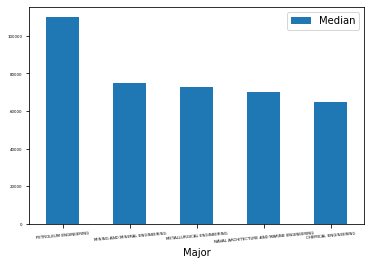

In [19]:
#Analysis of outliers
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

<AxesSubplot:xlabel='Major'>

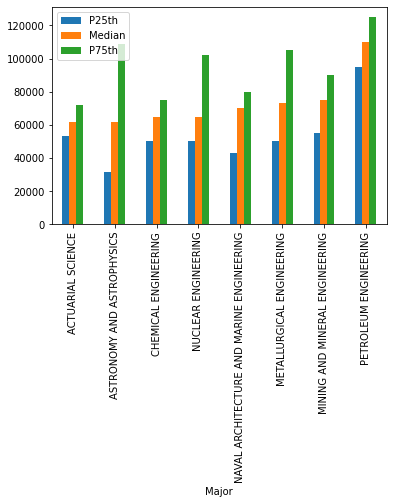

In [36]:
#Which are the majors whose median salary is above $60,000
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

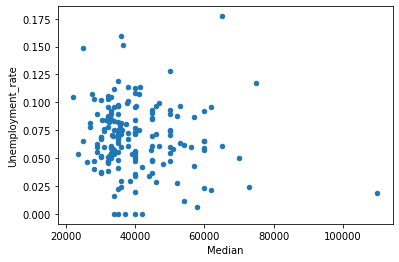

In [29]:
#Correlation checks if two columns are connected (move together)
#Compare the median salary with unemployment-rate
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

<AxesSubplot:ylabel='Major_category'>

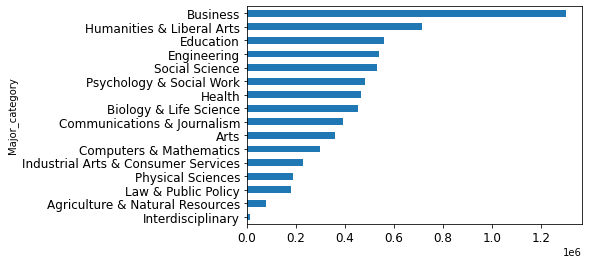

In [44]:
#Analyze categorical data by grouping
#With .groupby(), you create a DataFrameGroupBy object and 
#with .sum(), you create a Series.
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals
cat_totals.plot(kind="barh", fontsize=12)

<AxesSubplot:>

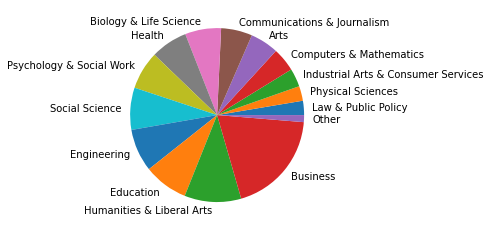

In [49]:
#Then create a pie chart to visualize ratios
#Lump smaller categories (with a total under 100K) into "Other"
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")

<AxesSubplot:ylabel='Frequency'>

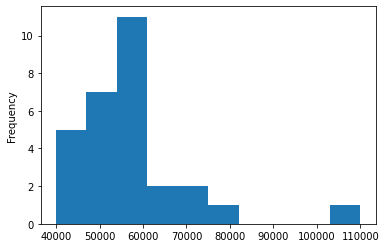

In [50]:
#Analyze the distribution of data within a category
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")
